# DATA FEATURES:
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information:


1) id: unique identifier


2) gender: "Male", "Female" or "Other"


3) age: age of the patient


4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension


5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


6) ever_married: "No" or "Yes"


7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


8) Residence_type: "Rural" or "Urban"


9) avg_glucose_level: average glucose level in blood


10) bmi: body mass index


11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


12) stroke: 1 if the patient had a stroke or 0 if not

# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d # used in 3D plotting
import matplotlib.pyplot as plt # data visualization
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns #

# EXPLORATORY DATA ANALYSIS

In [2]:
df = pd.read_csv('stroke.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.drop(['id'], axis=1, inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
print(df.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
bmi_median = df["bmi"].median()

# Fill the missing values with the median value
df["bmi"].fillna(bmi_median, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# CORRELATION MATRIX

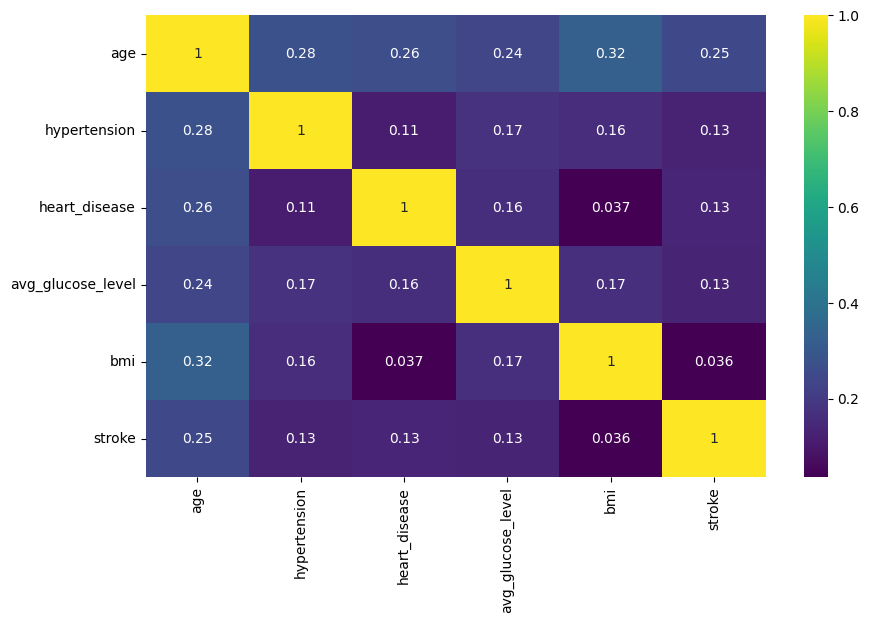

In [10]:
corr = df.corr()
max(corr)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='viridis', annot=True) 
plt.show()

# DATA VISUALIZATIONS

<AxesSubplot: xlabel='gender', ylabel='count'>

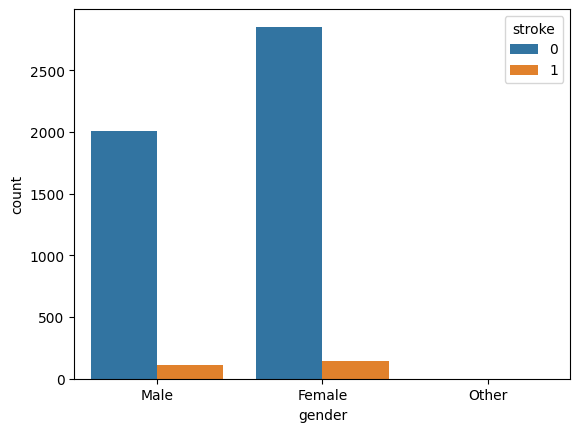

In [11]:
sns.countplot(x="gender", hue="stroke", data=df)

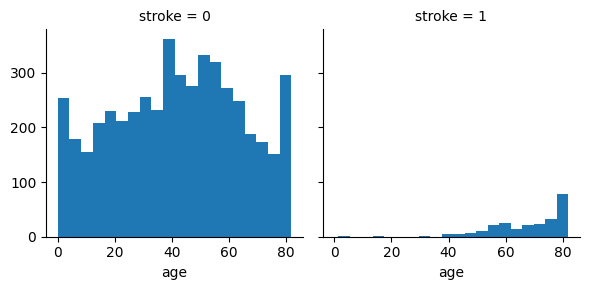

In [12]:
g = sns.FacetGrid(df, col="stroke")
g.map(plt.hist, "age", bins=20)

<AxesSubplot: xlabel='stroke', ylabel='avg_glucose_level'>

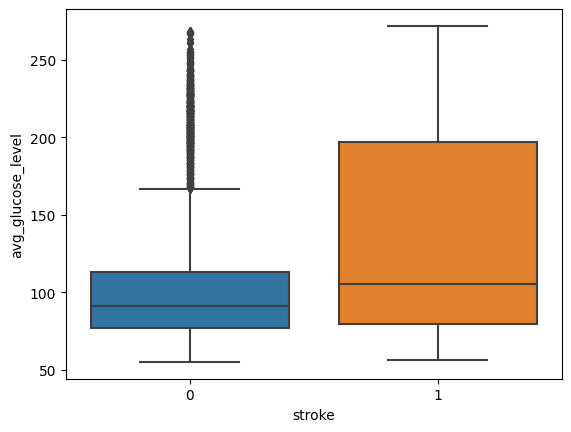

In [13]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df)

<AxesSubplot: xlabel='stroke', ylabel='age'>

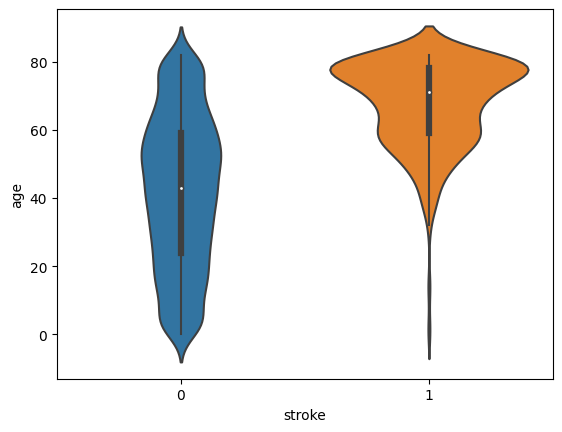

In [14]:
sns.violinplot(x="stroke", y="age", data=df)

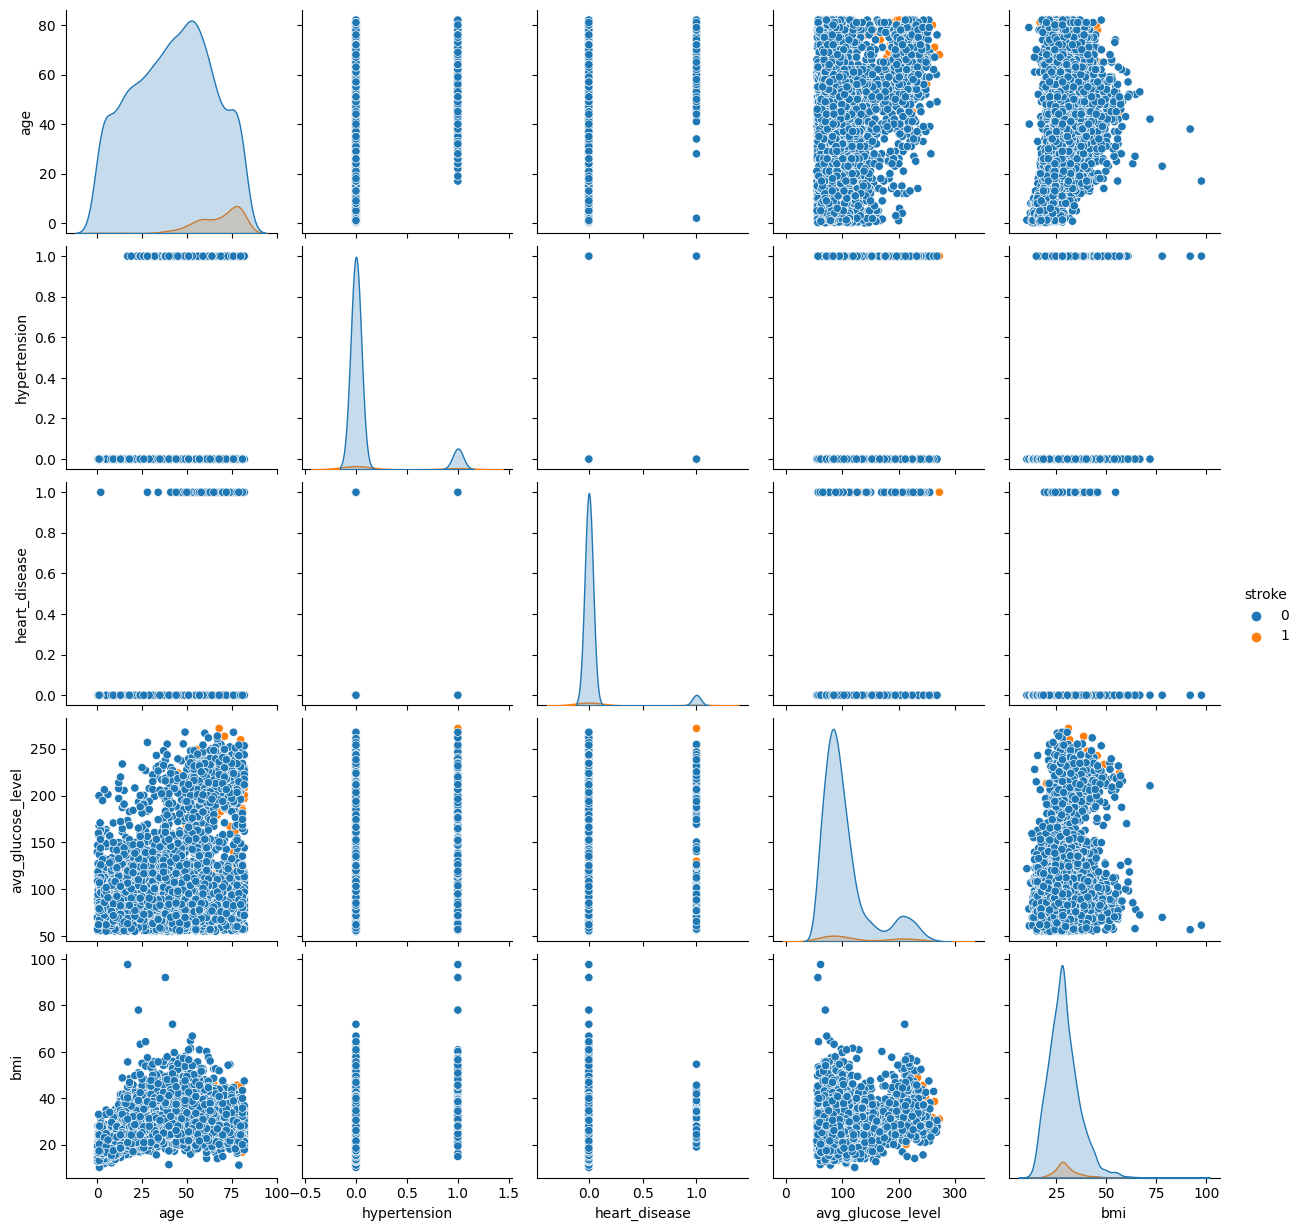

In [15]:
sns.pairplot(df, hue="stroke")

In [16]:
!pip install category_encoders==2.6.0

     ---------------------------------------- 0.0/81.2 kB ? eta -:--:--
     ---------------------------- --------- 61.4/81.2 kB 328.2 kB/s eta 0:00:01
     -------------------------------------- 81.2/81.2 kB 349.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.0 MB 1.3 MB/s eta 0:00:08
      --------------------------------------- 0.2/9.0 MB 2.4 MB/s eta 0:00:04
     - -------------------------------------- 0.4/9.0 MB 3.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.6/9.0 MB 3.5 MB/s eta 0:00:03
     --- ------------------------------------ 0.8/9.0 MB 4.0 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.0 MB 4.2 MB/s eta 0:00:02
     ------ --------------------------------- 1.5/9.0 MB 4.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.8/9.0 MB 4.9 MB/s eta 0:00:02
     -------- ------------------------------- 1.9/9.0 MB 4.9 MB/s eta 0:0

In [17]:
import category_encoders as ce

# TRAIN TEST SPLITTING

In [18]:
X= df.drop(['stroke'], axis=1)
y = df['stroke']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

# CHECKING THE ACCURACY

In [20]:
cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create the ordinal encoder
encoder = ce.OrdinalEncoder(cols=cols_to_encode)

# Fit and transform the training data
X_train = encoder.fit_transform(X_train)

# Transform the test data using the trained encoder
X_test = encoder.transform(X_test)

# View the encoded data
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4989,1,11.0,0,0,1,1,1,123.04,15.9,1
2977,1,75.0,0,0,2,2,2,73.89,20.9,1
328,1,21.0,0,0,1,3,1,89.44,21.9,2
4794,2,8.0,0,0,1,1,1,108.06,14.6,1
2056,1,3.0,0,0,1,1,2,101.30,24.8,1


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred =  model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.11%


# PICKLING THE MODEL

In [23]:
import pickle
with open('stroke.pkl', 'wb') as files:
    pickle.dump(model,files)